In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use("ggplot")

from tqdm import tqdm

In [2]:
datatype = "node"
prefix = "DB_10042"

In [3]:
df = pd.read_csv(f"../data/{prefix}_w_num_smiles.csv", index_col=0)
num_smiles = df[f"num_{datatype}_smiles"].values
num_smiles

/var/folders/wm/cr9_rg9d40sbj5kr5lkgwrlh0000gn/T/ipykernel_16540/4055154178.py:1: DtypeWarning: Columns (2,3,4,5,11,12,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"../data/{prefix}_w_num_smiles.csv", index_col=0)


array([1, 1, 1, ..., 1, 1, 1])

In [4]:
cum_indices = []

this_ind = 0
for n in num_smiles:
    cum_indices.append([this_ind + ind for ind in range(n)])
    this_ind += n
    
assert this_ind == sum(num_smiles)
assert len(cum_indices) == df.shape[0]
assert sum([len(inds) for inds in cum_indices]) == sum(num_smiles)

In [5]:
sum(num_smiles), len(cum_indices)

(11822, 10042)

In [6]:
cum_indices

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6, 7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14, 15],
 [16],
 [17],
 [18],
 [19],
 [20, 21],
 [22],
 [23],
 [24],
 [25],
 [26, 27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34, 35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41, 42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65, 66],
 [67],
 [68],
 [69, 70],
 [71],
 [72, 73],
 [74, 75, 76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86, 87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93, 94],
 [95],
 [96, 97, 98],
 [99],
 [100],
 [101],
 [102, 103],
 [104],
 [105, 106],
 [107],
 [108],
 [109],
 [110],
 [111, 112, 113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134, 135],
 [136],
 [137],
 [138],
 [139],
 [140, 141],
 [142],
 [143],
 [144],
 [145, 146],


In [7]:
full_similarities = np.load(f"../data/{prefix}_{datatype}_sims.npy")
assert full_similarities.shape[0] == full_similarities.shape[1]
assert full_similarities.shape[0] == sum(num_smiles)

In [8]:
similarities = np.ones((df.shape[0], df.shape[0]))

for i in tqdm(range(df.shape[0] - 1)):
    for j in range(i + 1, df.shape[0]):
        s = full_similarities[cum_indices[i], :][:, cum_indices[j]].mean()
        similarities[i, j] = s
        similarities[j, i] = s

100%|██████████████████████████████████████████████████████████| 10041/10041 [13:11<00:00, 12.68it/s]


In [9]:
np.save(f"../data/{prefix}_{datatype}_sims2.npy", similarities)

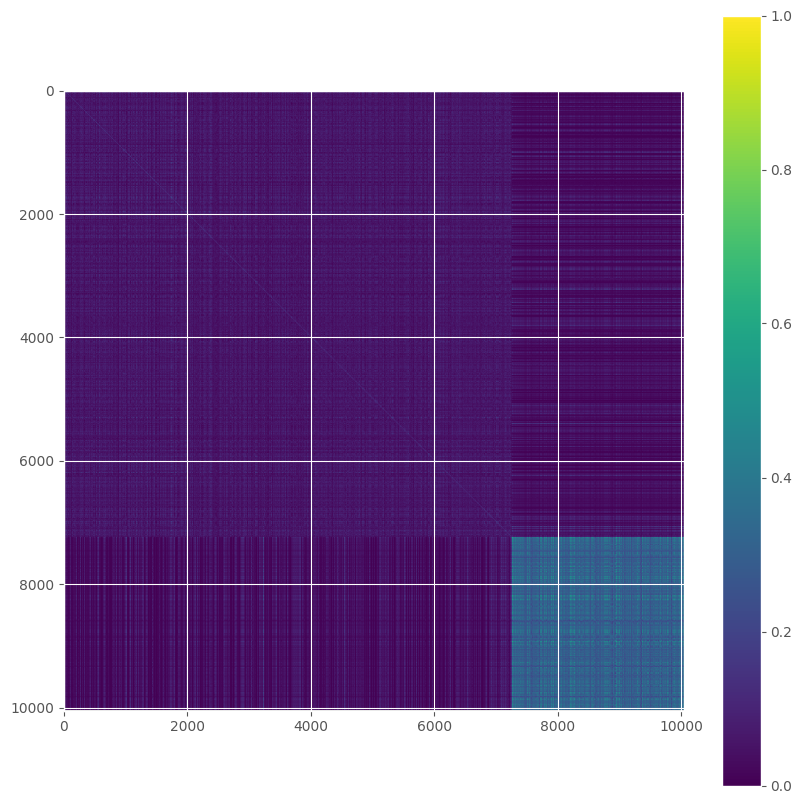

In [10]:
plt.figure(figsize=(10, 10))

plt.imshow(similarities)
plt.colorbar();